<a href="https://colab.research.google.com/github/lala991204/pandas/blob/master/4_1_matplotlib_line1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# Excel 데이터를 데이터프레임으로 변환
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/pandas/시도별 전출입 인구수.xlsx", engine='openpyxl', header=0)

In [14]:
# 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합 부분)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)
print(df_seoul.head(8))

            1970     1971     1972     1973  ...     2014     2015     2016     2017
전입지                                          ...                                    
전국       1448985  1419016  1210559  1647268  ...  1661425  1726687  1655859  1571423
부산광역시      11568    11130    11768    16307  ...    17320    17009    15062    14484
대구광역시          -        -        -        -  ...    10062    10191     9623     8891
인천광역시          -        -        -        -  ...    43212    44915    43745    40485
광주광역시          -        -        -        -  ...     9759     9216     8354     7932
대전광역시          -        -        -        -  ...    13403    13453    12619    11815
울산광역시          -        -        -        -  ...     6047     5950     5102     4260
세종특별자치시        -        -        -        -  ...     6481     7550     5943     5813

[8 rows x 48 columns]


In [11]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']
print(sr_one.head())

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
Name: 경기도, dtype: object


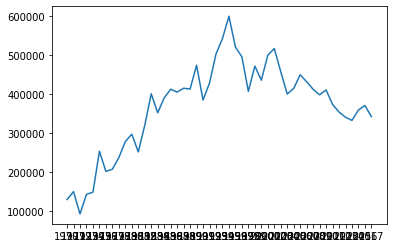

In [9]:
# x축, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

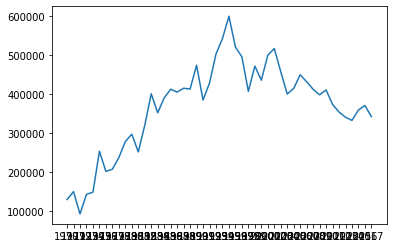

In [12]:
# 판다스 객체를 plot 함수에 입력
plt.plot(sr_one)